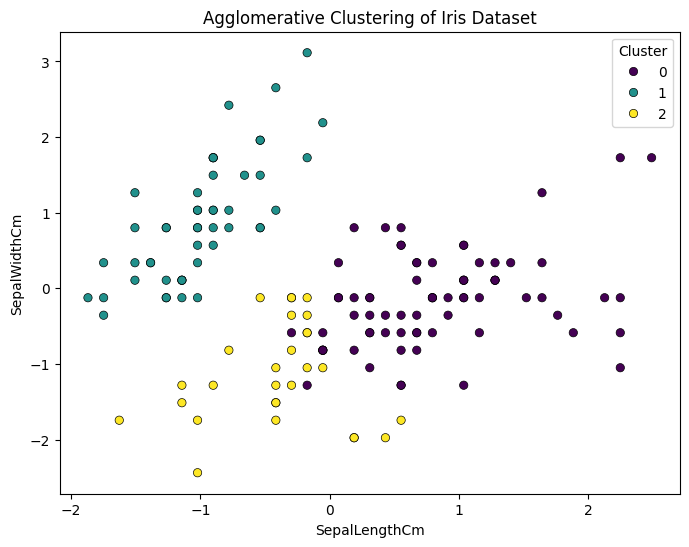

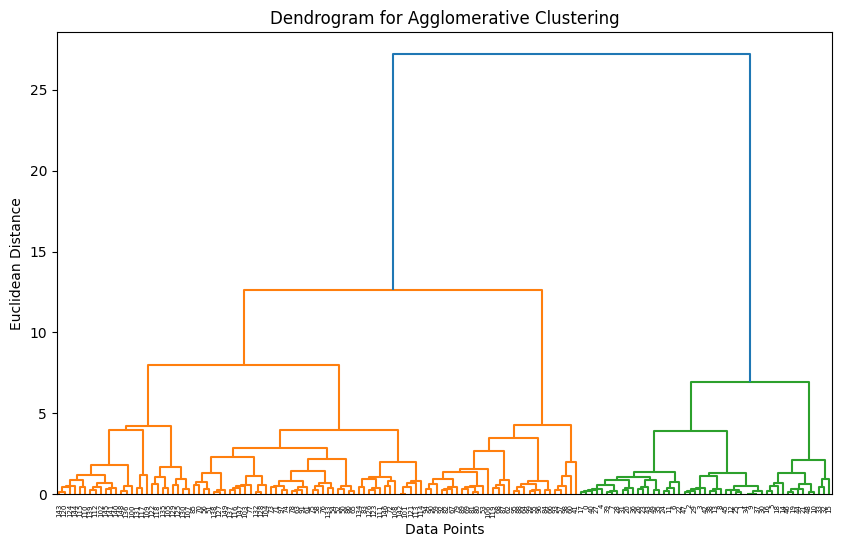

       Species  Cluster
0  Iris-setosa        1
1  Iris-setosa        1
2  Iris-setosa        1
3  Iris-setosa        1
4  Iris-setosa        1
5  Iris-setosa        1
6  Iris-setosa        1
7  Iris-setosa        1
8  Iris-setosa        1
9  Iris-setosa        1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Load dataset
df = pd.read_csv("/content/Iris.csv")

# Drop the 'Id' column if present
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])

# Features: Select only numerical columns (excluding 'Species')
X = df.drop(columns=['Species'])

# Standardize the features (recommended for better clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Agglomerative Clustering
k = 3  # We know there are 3 species in the Iris dataset
agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
df['Cluster'] = agg_clustering.fit_predict(X_scaled)

# Visualizing Clusters (Using first two features for plotting)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['Cluster'], palette='viridis', edgecolor='k')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.title("Agglomerative Clustering of Iris Dataset")
plt.legend(title="Cluster")
plt.show()

# Plot Dendrogram
plt.figure(figsize=(10, 6))
linked = linkage(X_scaled, method='ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

# Print Cluster Assignments
print(df[['Species', 'Cluster']].head(10))
